<a href="https://colab.research.google.com/github/luccidomingues/Teste1/blob/main/RottenTomatoesMovies_comparing_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing Classifiers for Building Classification Models


In this Jupyter notebook, we will be comparing the performance of different classifiers for building classification models.

## 1. Import a  dataset

### 1.1. Import library

In [8]:
! pip install lazypredict

     |████████████████████████████████| 6.8MB 4.7MB/s 
     |████████████████████████████████| 276kB 47.9MB/s 
     |████████████████████████████████| 127.6MB 39kB/s 
     |████████████████████████████████| 25.9MB 1.6MB/s 
     |████████████████████████████████| 307kB 34.5MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 10.1MB 42.8MB/s 
     |████████████████████████████████| 256kB 56.7MB/s 
     |████████████████████████████████| 1.2MB 48.3MB/s 
     |████████████████████████████████| 14.5MB 153kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=520d25a46468f5da6e2650c697cde033dcdf2e78f74720d3898ace430dab7419
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement

In [1]:
import pandas as pd

projects = 'Rotten Tomatoes Movies.csv'
dataset = pd.read_csv(projects)
dataset

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0,1192.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0,100946.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,142.0,Fox,Fresh,78,9,87.0,7126.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0,30170.0


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

In [30]:
# X = dataset.drop(['unfinished'], axis=1)

X = dataset.iloc[:,[10,13,14,15,16]]


In [31]:
X.isnull().sum()

runtime_in_minutes    155
tomatometer_rating      0
tomatometer_count       0
audience_rating       252
audience_count        252
dtype: int64

In [32]:
X.dropna(inplace=True)
X.isnull().sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


runtime_in_minutes    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
audience_count        0
dtype: int64

In [33]:
X = X.drop(['audience_rating'], axis=1)
Y = X.iloc[:,3]
X

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_count
0,83.0,49,144,254287.0
1,90.0,86,140,11567.0
2,118.0,68,22,14670.0
3,95.0,100,51,105000.0
4,127.0,89,27,68860.0
...,...,...,...,...
16633,104.0,56,9,1192.0
16634,108.0,97,279,100946.0
16635,142.0,78,9,7126.0
16636,139.0,95,21,30170.0


### 1.2. Let's examine the data dimension

In [34]:
X.shape

(16239, 4)

In [35]:
Y.shape

(16239,)

## 2. Data split (80/20 ratio)

### 2.1. Import library

In [36]:
from sklearn.model_selection import train_test_split

### 2.2. Data split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)



### 2.3. Let's examine the data dimension

In [ ]:
X_train.shape, Y_train.shape

((1725, 2), (1725,))

In [ ]:
X_test.shape, Y_test.shape

((432, 2), (432,))

## 3. Build Classification Models

Modified from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

### 3.1. Import modules

### 3.2. Defining learning classifiers

### 3.3. Build Model, Apply Model on Test Data & Record Accuracy Scores

In [37]:
# Import libraries
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np
from sklearn.model_selection import train_test_split


# Original load and split
# -----------------------
# Load dataset
# boston = datasets.load_boston()
# X, y = shuffle(boston.data, boston.target, random_state=42)

# Data split
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)
# -----------------------


# Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


# Defines and builds the lazyclassifier
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models_train,predictions_train = reg.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = reg.fit(X_train, X_test, Y_train, Y_test)

# Prints the model performance
models_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 42/42 [00:00<00:00, 18615.74it/s]

tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to ex

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LinearRegression,1.00,1.00,0.00,0.03
ExtraTreeRegressor,1.00,1.00,0.00,0.05
RANSACRegressor,1.00,1.00,0.00,0.03
HuberRegressor,1.00,1.00,0.00,0.43
LarsCV,1.00,1.00,0.00,0.04
OrthogonalMatchingPursuit,1.00,1.00,0.00,0.02
Lars,1.00,1.00,0.00,0.03
ExtraTreesRegressor,1.00,1.00,0.00,2.51
LassoLarsCV,1.00,1.00,0.00,0.04


In [43]:
# Model from original X-Y pairs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Luciano code
from sklearn.metrics import accuracy_score

# Data set
# X = dataset.drop(['logS'], axis=1)
# Y = dataset.iloc[:,-1]

# Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Y-Shuffling


# Model building
model = LinearRegression()
model.fit(X_train, Y_train)
# Make prediction
Y_train_pred = model.predict(X_train)
# Compute R2 score
r2a = r2_score(Y_train, Y_train_pred)

# Print R2 score
print('R² = %s' % r2a.round(2))

# asd = accuracy_score(Y_train, Y_train_pred)
# print('Accuracy = %s' % ac_score.round(2))




R² = 1.0


Text(0.5, 0, 'Consumption')

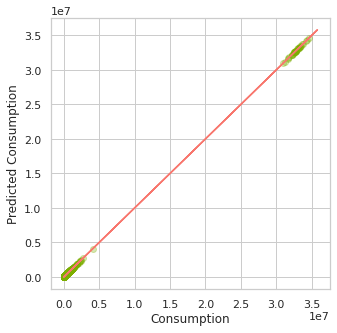

In [44]:
# Plot of predicted vs actual
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y_train, y=Y_train_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_train_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted Consumption')
plt.xlabel('Consumption')


In [38]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


In [39]:
[0 if i < 0 else i for i in models_train.iloc[:,0] ]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.999999999999986,
 0.9999999999991347,
 0.9999999999395829,
 0.9999999958766982,
 0.999999993959267,
 0.999999991975079,
 0.999999946757382,
 0.9999989996919759,
 0.9999983788318281,
 0.9999934790577821,
 0.9999876952081357,
 0.9987442236361731,
 0.9985679047155243,
 0.9929321809528618,
 0.9148663483342081,
 0.8888365380752863,
 0.873428413212902,
 0.8375796172236577,
 0.8290945746195298,
 0.7511137987455361,
 0.7511137987455361,
 0.5588901072674803,
 0.003717999021508267,
 0.0008399970446653082,
 0,
 0,
 0,
 0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

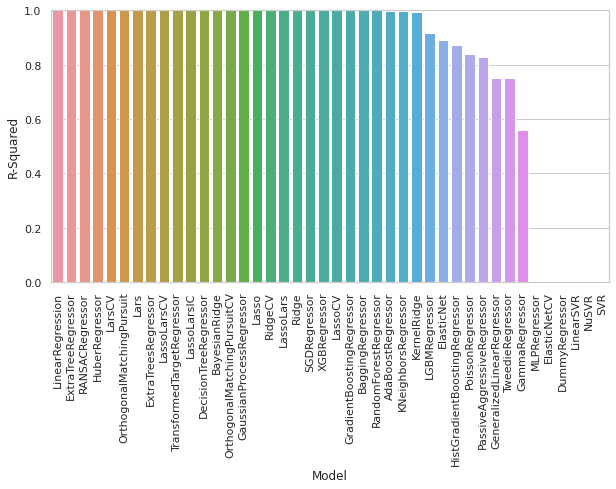

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models_train.index, y="R-Squared", data=models_train)
ax.set(ylim=(0, 1))
plt.xticks(rotation=90)

[(0.0, 1.0)]

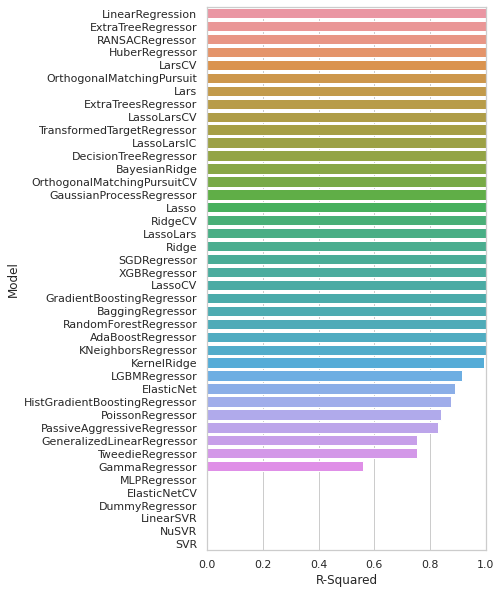

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

models_train["R-Squared"] = [0 if i < 0 else i for i in models_train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="R-Squared", data=models_train)
ax.set(xlim=(0, 1))

## 4. Analysis of Model Performance

### 4.1. Import library

### 4.2. Create data frame of *model performance*

### 4.3. Adding colors to the data frame

### 4.4. Bar plot of model performance

---